In [19]:
import sys
import time
sys.path.insert(0,"../")
import Constants.SI as SI
import eBeam
import eBeam_v02 as eBeam2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
c = SI.lightSpeed;
#% matplotlib notebook

In [20]:
# Beam parameters (Facet II)
gamma    = 20000; 
beta     = np.sqrt(1 - 1/gamma**2);
en       = 5.3e-6; # m-rad
beta_s = 0.05 # m  
# Get beam width from en and betatron
sigma_r1 = eBeam.get_sigma_r(en, beta_s, gamma);
sigma_z = 5.2e-6;
n_sigma_t = 2; # number of sigma_ts to calculate along
n_sigma_r = 10;
Q = 1.0e-9;
N = Q/SI.elemCharge
beamParams1 = [sigma_z, sigma_r1, beta, Q]
pPK1 = eBeam.peak_charge_dens(beamParams1)
sigma_t = sigma_z / (beta * c)

In [30]:
sigma_r1

3.6400549446402592e-06

In [21]:
# Ionization energies
Vi_Ar = 15.75962;
Vi_Ar_pp = 27.62967
Vi_He = 24.58741;
Vi_He_pp = 54.41778
Vi_Xe = 12.13;

In [22]:
# r and z arrays for computing the E field
npoints = 1000


r_start1 = -n_sigma_r * sigma_r1
r_end1   = -r_start1


r1 = np.linspace(r_start1,r_end1, npoints)

t_start = (-sigma_t/2) * n_sigma_t
t_end   = -t_start
t = np.linspace(t_start , t_end, npoints)

z_arr = np.linspace(-2*sigma_z, 2*sigma_z,npoints)

pos_1 = [r1, t]

pos_z1 = [r1,z_arr]

In [23]:
Er1, rPeak1, EPeak1 = eBeam.rad_E_field(pos_1, beamParams1)
W_Ar_1 = eBeam.ionization_rate(Er1, beamParams1, Vi_Ar)

W_He_1 = eBeam.ionization_rate(Er1, beamParams1, Vi_He)

n_Ar_1 = eBeam.plasmaDens(W_Ar_1, t, sigma_t)

n_He_1 = eBeam.plasmaDens(W_He_1, t, sigma_t)

In [31]:
beta

0.99999999875000001

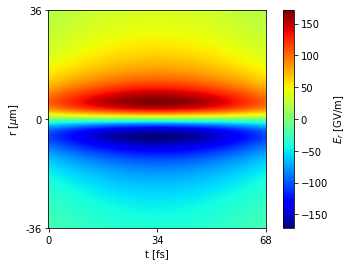

In [24]:
eBeam.plot_field_rt(np.flipud(Er1), [np.flipud(r1), t], '$E_r$ [GV/m]')

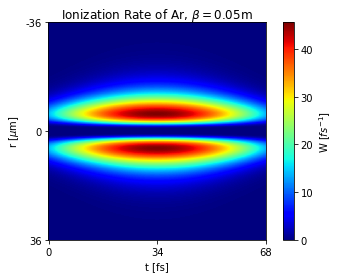

In [25]:
eBeam.plot_field_rt(W_Ar_1, pos_1,'W [$fs^{-1}$]', \
        gas = True, gasName = 'Ar, ' + r'$\beta = $' + str(beta_s) + 'm')

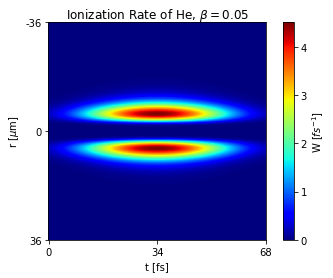

In [26]:
eBeam.plot_field_rt(W_He_1, pos_1, 'W [$fs^{-1}$]',\
                    [], gas = True, gasName = 'He, ' + r'$\beta = $' + str(beta_s))

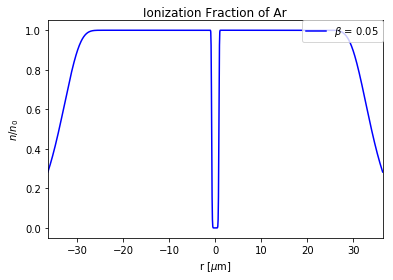

In [32]:
eBeam.plot_plasma([r1], [n_Ar_1], [min(r1)*1e6, max(r1)*1e6], 'Ar', [beta_s])

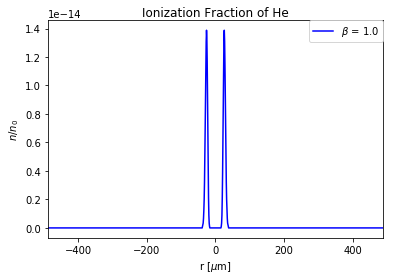

In [15]:
eBeam.plot_plasma([r1], [ n_He_1], [min(r1)*1e6, max(r1)*1e6],'He', [beta_s])

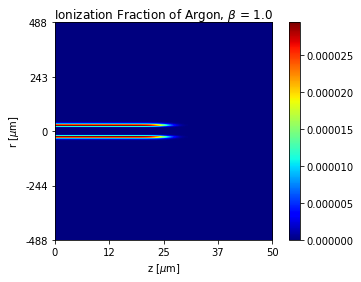

In [16]:
n_rz_Ar_1 = eBeam.plot_2D_plasma(np.flipud(W_Ar_1), np.flipud(r1), t, \
                               'Ionization Fraction of Argon, $\\beta$ = ' + str(beta_s)) 

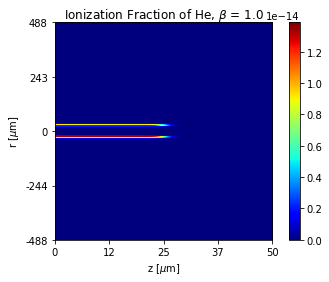

In [17]:
n_rz_He_1 = eBeam.plot_2D_plasma(np.flipud(W_He_1), np.flipud(r1), t, \
                               'Ionization Fraction of He, $\\beta$ = ' + str(beta_s)) 

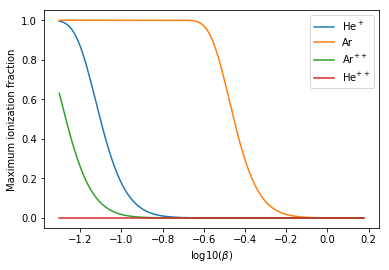

In [18]:
beta_arr = np.linspace(.05, 1.5, 1000)
max_ion_He = eBeam.maxIonization(beta_arr, sigma_z, gamma, en, Q, Vi_He)
max_ion_Ar = eBeam.maxIonization(beta_arr, sigma_z, gamma, en, Q, Vi_Ar)
max_ion_Ar_pp = eBeam.maxIonization(beta_arr, sigma_z, gamma, en, Q, Vi_Ar_pp)
max_ion_He_pp = eBeam.maxIonization(beta_arr, sigma_z, gamma, en, Q, Vi_He_pp)
plt.plot(np.log10(beta_arr), max_ion_He, label = 'He$^+$')
plt.plot(np.log10(beta_arr), max_ion_Ar, label = 'Ar')
plt.plot(np.log10(beta_arr), max_ion_Ar_pp, label = 'Ar$^{++}$')
plt.plot(np.log10(beta_arr), max_ion_He_pp, label = 'He$^{++}$')
plt.xlabel('log10($\\beta$)')
plt.ylabel('Maximum ionization fraction')
plt.legend()
plt.show()